# 网络构建

In [3]:
from torch import nn

class simpleModel(nn.Module):
    def __init__(self, input_dim, hidden1_n, hidden2_n, hidden3_n, hidden4_n, hidden5_n, output_dim):
        super(simpleModel, self).__init__()

        # 构建网络
        self.Layer = nn.Sequential(# 第一层网络
                                    nn.Linear(input_dim, hidden1_n),
                                    nn.BatchNorm1d(hidden1_n),
                                    nn.ReLU(True),
                                    # 第二层网络
                                    nn.Linear(hidden1_n, hidden2_n),
                                    nn.BatchNorm1d(hidden2_n),
                                    nn.ReLU(True),
                                    # 第三层网络
                                    nn.Linear(hidden2_n, hidden3_n),
                                    nn.BatchNorm1d(hidden3_n),
                                    nn.ReLU(True),
                                    # 第四层网络
                                    nn.Linear(hidden3_n, hidden4_n),
                                    nn.BatchNorm1d(hidden4_n),
                                    nn.ReLU(True),
                                    # 第五层网络
                                    nn.Linear(hidden4_n, hidden5_n),
                                    nn.BatchNorm1d(hidden5_n),
                                    nn.ReLU(True),
                                    # 第六层网络--输出层
                                    nn.Linear(hidden5_n, output_dim)
                                    )

    # 构建前向传播计算过程
    def forward(self, x):
        x = self.Layer(x)
        return x


# 模型训练

In [11]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# 初始化参数
batch_size = 50
learning_rate = 2e-3

# 实例化数据转换器 ———— 标准化
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.5,], [0.5,])])

# 获取数据 并 进行预处理
train_dataset = datasets.MNIST(root='.\data', train=True,
                               transform=data_transform, download=False)
test_dataset = datasets.MNIST(root='.\data', train=False,
                              transform=data_transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10000)

# 实例化模型
model = simpleModel(28*28, 1000, 500, 200, 50, 5, 1)
# 选择成本函数
criterion = nn.MSELoss()
# 选择优化器
optimizer =  optim.SGD(model.parameters(), lr=learning_rate)

# 模型训练
lloss_train = []
lloss_test = []
acc_train_lst = []
acc_test_lst = []
for epoch in range(50):
    model.train()
    for data in train_dataloader:
        img, label = data
        img = img.view(img.size(0), -1)

        # 计算输出
        output = model(img)
        # 计算损失函数
        loss = criterion(output.squeeze(), label.float())
        # 清零梯度缓存
        optimizer.zero_grad()
        # 计算损失函数的梯度
        loss.backward()
        # 更新参数
        optimizer.step()

    print('epoch:{0}, loss:{1}'.format(epoch, loss))
    # 记录 训练集 损失函数
    lloss_train.append(loss)
    # 记录 训练集 正确率
    acc_train = (output.round().squeeze() == label).sum() / batch_size
    acc_train_lst.append(acc_train)

    # 测试集
    model.eval()
    with torch.no_grad():
        for data_test in test_dataloader:
            img_test, label_test = data_test
            img_test = img_test.view(img_test.size(0), -1)
            output_test = model(img_test)
            loss_test = criterion(output_test.squeeze(), label_test.float())
            acc_test = (output_test.round().squeeze() == label_test).sum() / len(output_test)
        lloss_test.append(loss_test)
        acc_test_lst.append(acc_test)

# 保存模型
# torch.save(model, 'minist_DNN_mse')

epoch:0, loss:0.6551247239112854
epoch:1, loss:0.5017454028129578
epoch:2, loss:0.19441291689872742
epoch:3, loss:0.2673593759536743
epoch:4, loss:0.13456454873085022
epoch:5, loss:0.7274410128593445
epoch:6, loss:0.09568067640066147
epoch:7, loss:0.0611954927444458
epoch:8, loss:0.1787405163049698
epoch:9, loss:0.1642022281885147
epoch:10, loss:0.18584701418876648
epoch:11, loss:0.12795671820640564
epoch:12, loss:0.14866282045841217
epoch:13, loss:0.02951427549123764
epoch:14, loss:0.0532253123819828
epoch:15, loss:0.09459934383630753
epoch:16, loss:0.1471458077430725
epoch:17, loss:0.1755385845899582
epoch:18, loss:0.0922364816069603
epoch:19, loss:0.04135872423648834
epoch:20, loss:0.04816244915127754
epoch:21, loss:0.10313692688941956
epoch:22, loss:0.04682442173361778
epoch:23, loss:0.4004005491733551
epoch:24, loss:0.05001078546047211
epoch:25, loss:0.06241122633218765
epoch:26, loss:0.05822013318538666
epoch:27, loss:0.031312379986047745
epoch:28, loss:0.10886619240045547
epoch:

# 可视化 -- 六层网络结果(lr = 2e-3)

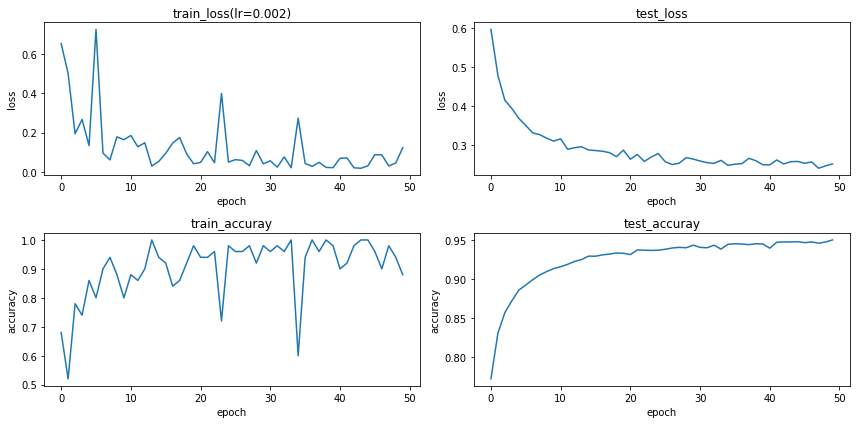

In [12]:
plt.figure(figsize=(12, 6))

# 训练误差
ax1 = plt.subplot(2, 2, 1)
ax1.plot(lloss_train)
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('train_loss(lr={0})'.format(eval(str(learning_rate))))

# 测试误差
ax2 = plt.subplot(2, 2, 2)
ax2.plot(lloss_test)
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('test_loss')

# 训练准确率
ax3 = plt.subplot(2, 2, 3)
ax3.plot(acc_train_lst)
ax3.set_xlabel('epoch')
ax3.set_ylabel('accuracy')
ax3.set_title('train_accuray')

# 测试准确率
ax4 = plt.subplot(2, 2, 4)
ax4.plot(acc_test_lst)
ax4.set_xlabel('epoch')
ax4.set_ylabel('accuracy')
ax4.set_title('test_accuray')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.tight_layout()
plt.show()

# 可视化 -- 五层网络结果(lr = 2e-3)

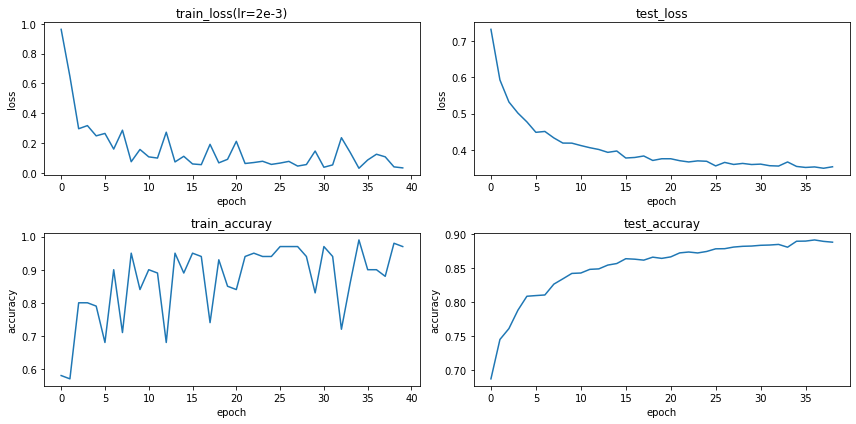

In [120]:
plt.figure(figsize=(12, 6))

# 训练误差
ax1 = plt.subplot(2, 2, 1)
ax1.plot(lloss_train)
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('train_loss(lr={0})'.format(eval(str(learning_rate))))

# 测试误差
ax2 = plt.subplot(2, 2, 2)
ax2.plot(lloss_test)
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('test_loss')

# 训练准确率
ax3 = plt.subplot(2, 2, 3)
ax3.plot(acc_train_lst)
ax3.set_xlabel('epoch')
ax3.set_ylabel('accuracy')
ax3.set_title('train_accuray')

# 测试准确率
ax4 = plt.subplot(2, 2, 4)
ax4.plot(acc_test_lst)
ax4.set_xlabel('epoch')
ax4.set_ylabel('accuracy')
ax4.set_title('test_accuray')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.tight_layout()
plt.show()

# 可视化 -- 四层网络结果(lr = 2e-3)

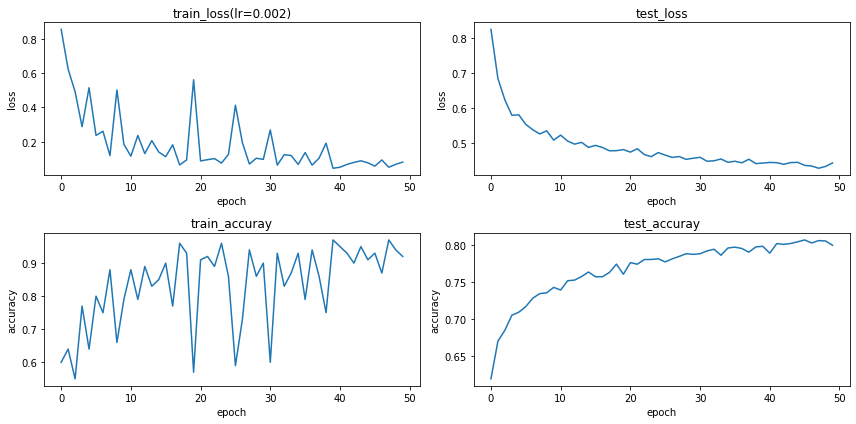

In [8]:
plt.figure(figsize=(12, 6))

# 训练误差
ax1 = plt.subplot(2, 2, 1)
ax1.plot(lloss_train)
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('train_loss(lr={0})'.format(eval(str(learning_rate))))

# 测试误差
ax2 = plt.subplot(2, 2, 2)
ax2.plot(lloss_test)
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('test_loss')

# 训练准确率
ax3 = plt.subplot(2, 2, 3)
ax3.plot(acc_train_lst)
ax3.set_xlabel('epoch')
ax3.set_ylabel('accuracy')
ax3.set_title('train_accuray')

# 测试准确率
ax4 = plt.subplot(2, 2, 4)
ax4.plot(acc_test_lst)
ax4.set_xlabel('epoch')
ax4.set_ylabel('accuracy')
ax4.set_title('test_accuray')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
np.random.randint(2,5,9).reshape(3,3)

array([[4, 2, 3],
       [2, 2, 2],
       [4, 2, 4]])